In [3]:
import os
import zipfile

# Unzipping the dataset
with zipfile.ZipFile('/content/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Checking the directory structure of the unzipped dataset
dataset_dir = '/content/dataset'
os.listdir(dataset_dir)


['__MACOSX', 'dataset']

In [4]:
# Checking the content of the 'dataset' directory
dataset_main_dir = os.path.join(dataset_dir, 'dataset')
os.listdir(dataset_main_dir)


['50310987472_d7e9cf628a_c.jpg',
 '50303475372_b0c955ef5a_c.jpg',
 '50289658392_f54f9cca42_c.jpg',
 '50264062602_785dbbd3bd_c.jpg',
 '50298686351_ba89e8f933_c.jpg',
 '50324644922_f2622ee6d7_c.jpg',
 '50312879161_80ef4cd57a_c.jpg',
 '50265429102_8d4556d012_c.jpg',
 '50298764701_5a10c90f02_c.jpg',
 '50316769667_a3d27b98a6_c.jpg',
 '50298916796_e64f76ca7d_c.jpg',
 '50277983308_3efe0980ee_c.jpg',
 '50300883818_ff4f845e89_c.jpg',
 '50276919016_7a6fba602a_c.jpg',
 '50301711923_240a53e8b5_c.jpg',
 '50288753757_3565fa9456_c.jpg',
 '50292432192_9c5a8bfb24_c.jpg',
 '50307641386_a90ef48967_c.jpg',
 '50278656332_7369eb9e32_c.jpg',
 '50304904552_4d0bb5bc92_c.jpg',
 '50302227306_c5d12e885c_c.jpg',
 '50295099093_40f806b0d6_c.jpg',
 '50293861663_5c7b7957b2_c.jpg',
 '50222077726_abeb1b9a4a_c.jpg',
 '50290170278_44828fd563_c.jpg',
 '50301976321_7b64c77036_c.jpg',
 '50278286761_f3f3beb5ce_c.jpg',
 '50311520863_09ace8c2ed_c.jpg',
 '50296050767_8eddf0556b_c.jpg',
 '50282083501_8ece7333c3_c.jpg',
 '50286770

In [5]:
# Displaying a subset of the filenames to understand the naming convention
sample_filenames = os.listdir(dataset_main_dir)[:20]
sample_filenames


['50310987472_d7e9cf628a_c.jpg',
 '50303475372_b0c955ef5a_c.jpg',
 '50289658392_f54f9cca42_c.jpg',
 '50264062602_785dbbd3bd_c.jpg',
 '50298686351_ba89e8f933_c.jpg',
 '50324644922_f2622ee6d7_c.jpg',
 '50312879161_80ef4cd57a_c.jpg',
 '50265429102_8d4556d012_c.jpg',
 '50298764701_5a10c90f02_c.jpg',
 '50316769667_a3d27b98a6_c.jpg',
 '50298916796_e64f76ca7d_c.jpg',
 '50277983308_3efe0980ee_c.jpg',
 '50300883818_ff4f845e89_c.jpg',
 '50276919016_7a6fba602a_c.jpg',
 '50301711923_240a53e8b5_c.jpg',
 '50288753757_3565fa9456_c.jpg',
 '50292432192_9c5a8bfb24_c.jpg',
 '50307641386_a90ef48967_c.jpg',
 '50278656332_7369eb9e32_c.jpg',
 '50304904552_4d0bb5bc92_c.jpg']

In [6]:
# Checking for any other files or directories in the dataset directory (excluding the __MACOSX folder)
all_files_and_dirs = os.listdir(dataset_dir)
relevant_files_and_dirs = [item for item in all_files_and_dirs if item != "__MACOSX"]

relevant_files_and_dirs


['dataset']

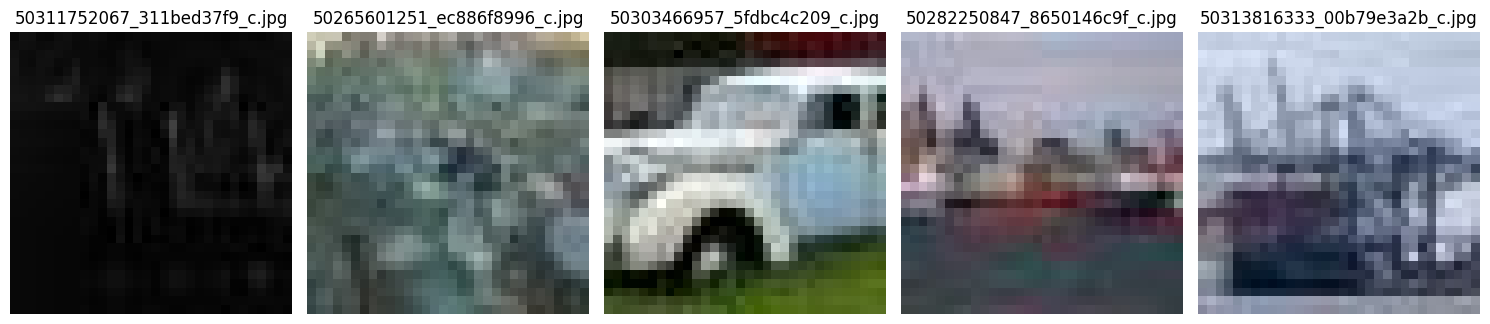

In [7]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Randomly selecting a subset of images
num_samples = 5
random_sample_filenames = random.sample(os.listdir(dataset_main_dir), num_samples)

# Displaying the selected images
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for ax, filename in zip(axes, random_sample_filenames):
    img_path = os.path.join(dataset_main_dir, filename)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(filename)

plt.tight_layout()
plt.show()


In [9]:
# Extracting the shapes of a subset of images to understand the distribution of sizes and channels
image_shapes = [mpimg.imread(os.path.join(dataset_main_dir, filename)).shape for filename in random.sample(os.listdir(dataset_main_dir), 500)]

# Extracting unique shapes and their counts
unique_shapes, counts = np.unique(image_shapes, return_counts=True, axis=0)

unique_shapes, counts


(array([[32, 32,  3]]), array([500]))

In [10]:
import numpy as np

# Extracting unique shapes and their counts
unique_shapes, counts = np.unique(image_shapes, return_counts=True, axis=0)

unique_shapes, counts


(array([[32, 32,  3]]), array([500]))

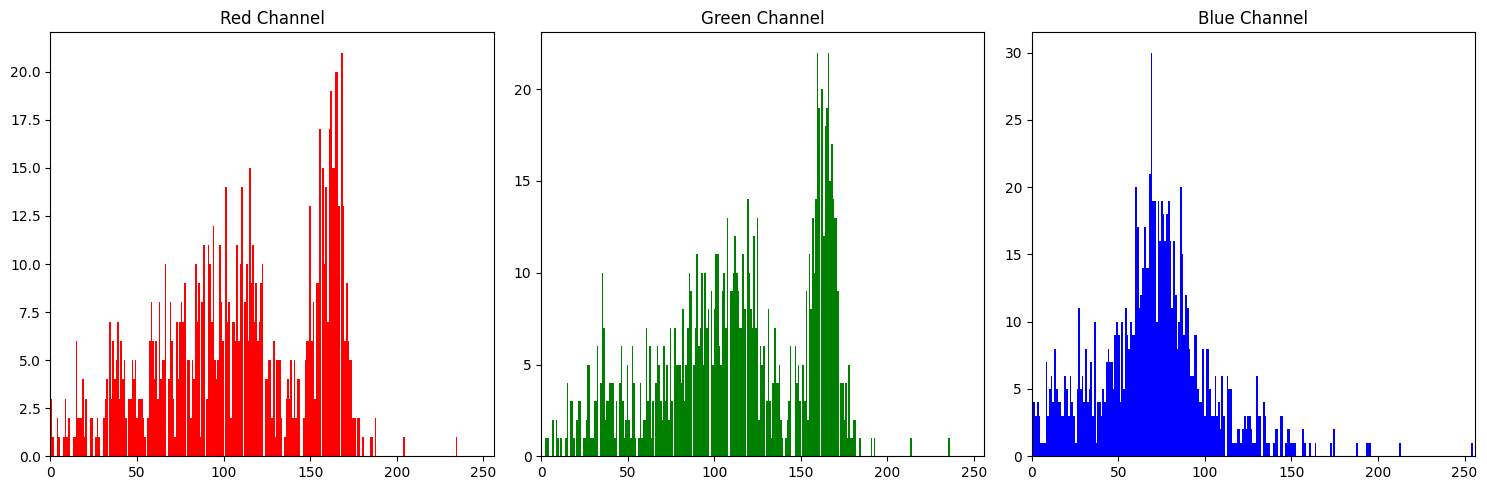

In [11]:
# Function to plot color distribution for a sample image
def plot_color_distribution(image):
    # Splitting the channels: Red, Green and Blue
    r = image[:, :, 0]
    g = image[:, :, 1]
    b = image[:, :, 2]

    # Plotting
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(r.ravel(), bins=256, color='red')
    plt.title('Red Channel')
    plt.xlim([0, 256])

    plt.subplot(1, 3, 2)
    plt.hist(g.ravel(), bins=256, color='green')
    plt.title('Green Channel')
    plt.xlim([0, 256])

    plt.subplot(1, 3, 3)
    plt.hist(b.ravel(), bins=256, color='blue')
    plt.title('Blue Channel')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Selecting a random image for color distribution analysis
sample_image_path = os.path.join(dataset_main_dir, random.choice(os.listdir(dataset_main_dir)))
sample_image = mpimg.imread(sample_image_path)

# Displaying color distribution
plot_color_distribution(sample_image)


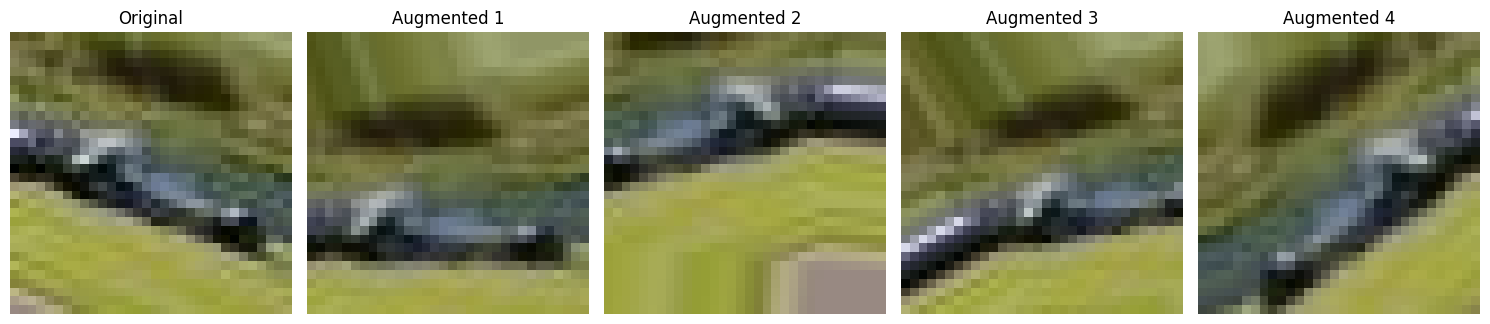

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Defining data augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=30,      # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.2,         # randomly zoom image
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2, # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,   # randomly flip images horizontally
    fill_mode='nearest'     # fill strategy for points outside boundaries
)

# Taking a sample image for demonstration
augmented_images = [sample_image]

# Generating augmented images
for i in range(4):  # Generating 4 augmented versions of the sample image
    augmented = datagen.random_transform(sample_image)
    augmented_images.append(augmented)

# Displaying the original and augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
titles = ['Original', 'Augmented 1', 'Augmented 2', 'Augmented 3', 'Augmented 4']

for ax, img, title in zip(axes, augmented_images, titles):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [13]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to [0,1]
)

# Assuming images are stored in a directory named 'dataset' and have corresponding labels
train_data = datagen.flow_from_directory('dataset', target_size=(32, 32), class_mode='categorical', batch_size=32)


Found 23988 images belonging to 2 classes.


In [22]:
from sklearn.cluster import KMeans
from keras.preprocessing.image import img_to_array, load_img
import os
import numpy as np

# Load images and preprocess
all_images = []
image_paths = [f for f in os.listdir('dataset') if os.path.isfile(os.path.join('dataset', f)) and not f.startswith('.')]
for image_path in image_paths:
    img = load_img(os.path.join('dataset', image_path), target_size=(32, 32))
    img_array = img_to_array(img) / 255.0  # Normalize
    all_images.append(img_array.flatten())  # Flatten to 1D

all_images = np.array(all_images)

# Check if any images were loaded
if all_images.shape[0] == 0:
    print("No images were loaded. Please check the dataset path and structure.")
else:
    # Using KMeans to cluster images (assuming 4 clusters/classes)
    kmeans = KMeans(n_clusters=4)
    clusters = kmeans.fit_predict(all_images)


No images were loaded. Please check the dataset path and structure.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(all_images, clusters, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Building the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes

# Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


In [25]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 73.9 MB/s eta 0:00:00


In [26]:
import sweetviz as sv
import pandas as pd

In [ ]:
report = sv.analyze(data)
report.show_notebook()